# Predicting houses prices

In [1]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

In [2]:
#reading the data and showing the head of it
dataset = pd.read_csv('houses.csv')
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [5]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [6]:
dataset.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,308.000000


### Visualising some features vs the price

Text(0.5, 1.0, 'The effect of the Bedrooms on Price')

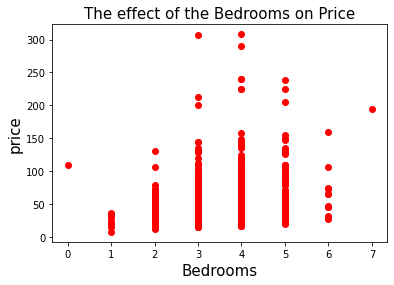

In [7]:
# Visualising bedrooms feature vs price of the house
plt.scatter(dataset['bedrooms'], dataset['price'], color = 'red')
plt.xlabel("Bedrooms",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title("The effect of the Bedrooms on Price",fontsize=15)

Text(0.5, 1.0, 'The effect of the bathrooms on Price')

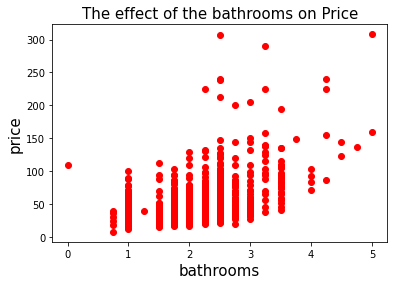

In [8]:
# Visualising bathrooms feature vs price of the house
plt.scatter(dataset['bathrooms'], dataset['price'], color = 'red')
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title("The effect of the bathrooms on Price",fontsize=15)

Text(0.5, 1.0, 'The effect of the floors on the Price')

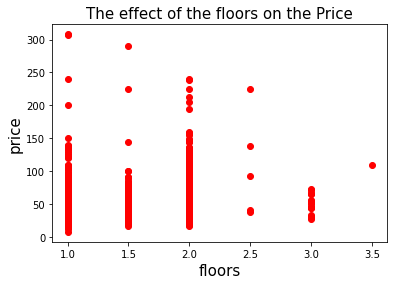

In [9]:
# Visualising floors feature vs price of the house
plt.scatter(dataset['floors'], dataset['price'], color = 'red')
plt.xlabel("floors",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title("The effect of the floors on the Price",fontsize=15)

Text(0.5, 1.0, 'The effect of the view on Price')

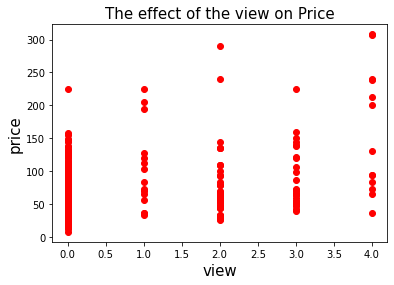

In [10]:
# Visualising view feature vs price of the house
plt.scatter(dataset['view'], dataset['price'], color = 'red')
plt.xlabel("view",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title("The effect of the view on Price",fontsize=15)

## Data Preprocessing

In [11]:
#cleaning_data
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(dataset)
dataset = imp.transform(dataset)

In [12]:
#X Data
X = dataset[:, :-1]
print('X shape is ' , X.shape)
print("========================================================")
#y Data
y = dataset[:, -1]
print('y shape is ' , y.shape)

X shape is  (1000, 17)
y shape is  (1000,)


In [13]:
# Data scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (670, 17)
X_test shape is  (330, 17)
y_train shape is  (670,)
y_test shape is  (330,)


# Apply Algorithms

## 1- Linear Regression

In [15]:
#Applying Linear Regression Model 

LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)

Linear Regression Train Score is :  0.73965061910456
Linear Regression Test Score is :  0.6891016972061732
Linear Regression Coef is :  [-0.86144511  0.95995387  4.99661757  1.12054807  0.94361876  4.51545792
  5.42435376  2.07798081  9.32835792  4.74967232  1.51719844 -7.31083168
  3.11261589 -1.85159215  8.01224131 -1.38215303  5.70697305]


In [16]:
#Calculating Prediction
y_pred1 = LinearRegressionModel.predict(X_test)

# compare between predicted and true values
print('Predicted Value for Linear Regression is : ' , y_pred1[:10])
print('True values for y : ',y_test[:10])

Predicted Value for Linear Regression is :  [27.1178214  20.75900918 63.95402179 23.10610326 27.85410782 77.04416126
 31.84799472 55.39630035 38.03741001 38.96117618]
True values for y :  [17.18  23.    77.5   24.5   27.995 85.66  24.5   50.    45.    51.2  ]


In [17]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred1, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred1, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  12.517963964957374
Mean Squared Error Value is :  378.6272825682071


## 2- Random Forest

In [46]:
#Applying Random Forest Regressor Model 

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=33
                                                   ,criterion='absolute_error')
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_in_)


Random Forest Regressor Train Score is :  0.958230794411781
Random Forest Regressor Test Score is :  0.7278827775724337
Random Forest Regressor No. of features are :  17


In [47]:
#Calculating Prediction
y_pred2 = RandomForestRegressorModel.predict(X_test)

# compare between predicted and true values
print('Predicted Value for Random Forest Regressor is : ' , y_pred2[:10])
print('True values for y : ',y_test[:10])

Predicted Value for Random Forest Regressor is :  [29.419033   20.6361375  47.6608485  28.0933705  27.5307495  76.88625
 23.8371     45.977199   51.86586952 45.858349  ]
True values for y :  [17.18  23.    77.5   24.5   27.995 85.66  24.5   50.    45.    51.2  ]


In [48]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred2, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred2, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  9.274917154152638
Mean Squared Error Value is :  331.3977707240274


## 3- DecisionTree

In [21]:
#Applying DecisionTreeRegressor Model 


DecisionTreeRegressorModel = DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                                                   random_state=33,min_samples_leaf=4)
DecisionTreeRegressorModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.8368421696446185
DecisionTreeRegressor Test Score is :  0.704661002477043


In [22]:
#Calculating Prediction
y_pred3 = DecisionTreeRegressorModel.predict(X_test)

# compare between predicted and true values
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred3[:10])
print('True values for y : ',y_test[:10])

Predicted Value for DecisionTreeRegressorModel is :  [23.5    21.4    37.5    27.5    26.8975 82.4    21.4    48.825  53.217
 44.45  ]
True values for y :  [17.18  23.    77.5   24.5   27.995 85.66  24.5   50.    45.    51.2  ]


In [23]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred3, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred3, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  10.39897
Mean Squared Error Value is :  359.6783934285152
